# Shors algorithm analysis 


## Shors algorithm for N = 15: 

### The algorithm:  

In [11]:
from numpy.random import seed, randint
# imports for RSA
from numpy import gcd
from numpy.random import seed, randint
# imports for Shor
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
import math
seed(1)
N=15
a = randint(2, N) # 1 < a < N

if math.gcd(a, N) == 1: # a shares no factors
    print(f"{1} < {a} < {N}, {1 < a < N}")
else: # a shares a factor
    P = gcd(a, N)
    Q = N // gcd(a, N)
    print(f"P = {P}\nQ = {Q}\n\n",
          f"{P} x {Q} = {N}, {P * Q == N}\n")

1 < 7 < 15, True


In [12]:
def initialize_qubits(qc, n, m):
    qc.h(range(n)) # apply hadamard gates
    qc.x(n+m-1) # set qubit to 1

In [13]:
print(f"Which in your case is\n\tU(x) = a^x mod {N}")



Which in your case is
	U(x) = a^x mod 15


In [15]:
# functions

def a_x_mod15(a, x):
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(x):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"U({x})"
    c_U = U.control()
    return c_U 

def modular_exponentiation(qc, n, m, a):
    for x in range(n):
        exponent = 2**x
        qc.append(a_x_mod15(a, exponent), 
                     [x] + list(range(n, n+m)))

def apply_iqft(qc, measurement_qubits):
    qc.append(QFT(len(measurement_qubits),
                             do_swaps=False).inverse(),
                         measurement_qubits)

def measure(qc, n):
    qc.measure(n, n)


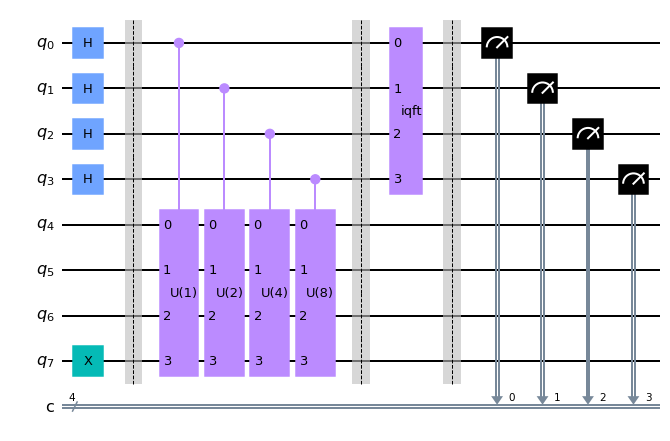

In [16]:
n = 4; m = 4

qc = period_finder(n, m, a)
qc.draw(output='mpl')

### Running the circuit in a simulated quantum enviornment:  

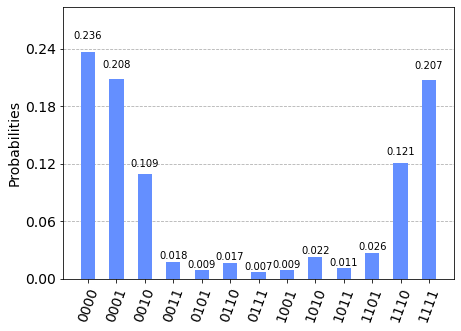

In [17]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=simulator)
result = job.result()
counts = result.get_counts(qc)

plot_histogram(counts)

In [18]:
result = job.result() 
execution_time = result.time_taken
print(execution_time)

0.00493168830871582


### Running the circuit in an actual Quantum environment: 

In [20]:
# Connecting to IBM 
from qiskit import IBMQ	
IBMQ.save_account('1840e4f2f0bdfcc03c06a6211f6bf750c32729f6e4d1bfeed1c90da39b325064c94779d6e73635106e47ef2eeebd0101682115fbb3ee009b0827e81b8b087b61')

/Users/JOAW-BOOK/Library/Python/3.8/lib/python/site-packages/qiskit/aqua/operators/operator_globals.py:48: DeprecationWarning: `from_label` is deprecated and will be removed no earlier than 3 months after the release date. Use Pauli(label) instead.
  X = make_immutable(PrimitiveOp(Pauli.from_label('X')))
configrc.store_credentials:WARNING:2021-05-27 11:28:30,182: Credentials already present. Set overwrite=True to overwrite.


In [8]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q',group='open', project='main')
qcomp = provider.get_backend('ibmq_16_melbourne')

/Users/JOAW-BOOK/Library/Python/3.8/lib/python/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [9]:
# find out which quantum computer is the least busy 
num_qubits = 8

from qiskit.providers.ibmq import least_busy
possible_devices = provider.backends(filters=lambda x: 
                                     x.configuration().n_qubits >= num_qubits
                                       and 
                                     x.configuration().simulator == False)
qcomp = least_busy(possible_devices)
print(qcomp) 

ibmq_16_melbourne


In [10]:
# running it 
job = execute(qc, backend=qcomp) 

In [11]:
# track progress 

from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job incurred error     


In [35]:
# get results 
result = job.result()
plot_histogram(result.get_counts(circuit))

NameError: name 'circuit' is not defined

In [ ]:
counts = result.get_counts()
execution_time = result.time_taken


# Junk

configrc.store_credentials:WARNING:2021-05-27 11:29:18,884: Credentials already present. Set overwrite=True to overwrite.
/Users/JOAW-BOOK/Library/Python/3.8/lib/python/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


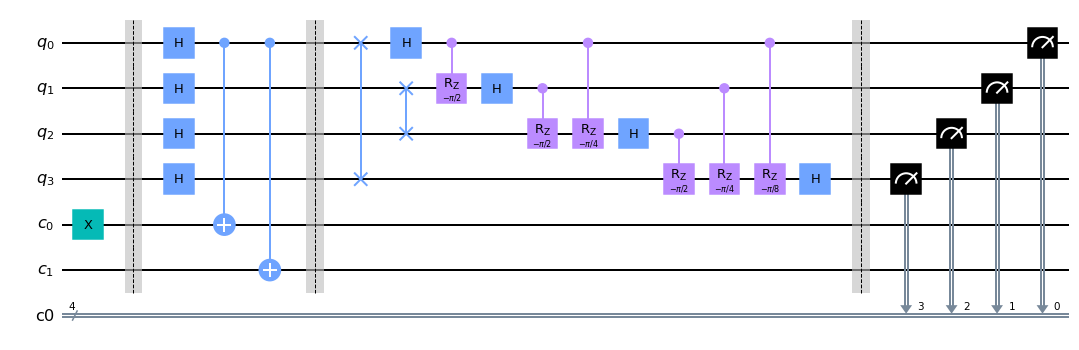

In [21]:
# Importing standard Qiskit libraries and configuring account
from qiskit.compiler import transpile, assemble
from qiskit import IBMQ	
IBMQ.save_account('1840e4f2f0bdfcc03c06a6211f6bf750c32729f6e4d1bfeed1c90da39b325064c94779d6e73635106e47ef2eeebd0101682115fbb3ee009b0827e81b8b087b61')
provider = IBMQ.load_account()

import numpy as np
import math
import qiskit as q
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute, IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_hinton

pi = np.pi

qc_q = QuantumRegister(4, 'q') #Initialize the Working Register
qc_c = QuantumRegister(2, 'c') #Initialize the Control Register
c = ClassicalRegister(4) #Register which will eventually hold measurements
Shor = QuantumCircuit(qc_q, qc_c,c)

Shor.x(4) # It is common convention to add a not gate before Modular Exponentiation
Shor.barrier()

Shor.h(qc_q[0:4]) #Initialize 4 Hadamard Gates to allow for all possibilities

#This is a compiled version of modular exponentiation that will not generalize outside of fermat primes.
Shor.cx(qc_q[0],qc_c[0]) 
Shor.cx(qc_q[0],qc_c[1])
Shor.barrier()

#This can be ommited by classically swapping the order of measurments if noise is an issue.
Shor.swap(qc_q[0],qc_q[3])
Shor.swap(qc_q[1],qc_q[2])

#The Inverse Quantum Fourier Transform
Shor.h(0)
Shor.crz(-pi/2,qc_q[0],qc_q[1])
Shor.h(1)

Shor.crz(-pi/2,qc_q[1],qc_q[2])
Shor.crz(-pi/4,qc_q[0],qc_q[2])
Shor.h(2)

Shor.crz(-pi/2,qc_q[2],qc_q[3])
Shor.crz(-pi/4,qc_q[1],qc_q[3])
Shor.crz(-pi/8,qc_q[0],qc_q[3])
Shor.h(3)

Shor.barrier()

#Measure Working Register
Shor.measure(qc_q[3],3)
Shor.measure(qc_q[2],2)
Shor.measure(qc_q[1],1)
Shor.measure(qc_q[0],0)

Shor.draw(output='mpl')


In [22]:

simulator = Aer.get_backend('qasm_simulator')
backend = provider.get_backend("ibmq_16_melbourne")

# Replace simulator in execute function with 'backend' to run on a quantum computer
job = execute(Shor, simulator, shots=5000)
result = job.result()
counts = result.get_counts(Shor)

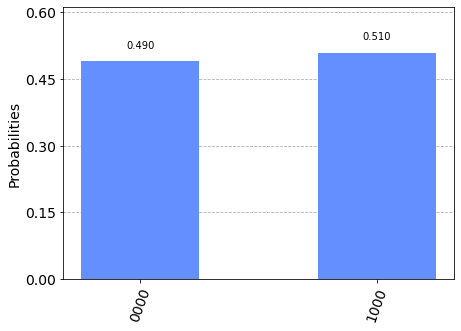

In [23]:
plot_histogram(counts)

In [ ]:
job = execute(Shor, backend, shots=5000)
result = job.result()
counts = result.get_counts(Shor)

Error: Pip module Unable to parse debugpy output, please log an issue with https://github.com/microsoft/vscode-jupyter is required for debugging cells. You will need to install it to debug cells.

In [34]:
# track progress 

from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job is queued

KeyboardInterrupt: 

In [ ]:
# results 
plot_histogram(counts)

In [41]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q',group='open', project='main')
qcomp = provider.get_backend('ibmq_16_melbourne')

backend = qcomp

ibmqfactory.load_account:WARNING:2021-05-27 11:49:32,728: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
job = execute(Shor, backend=qcomp)